In [1]:
import dotenv
import os
import sys
from PIL import Image 
from matplotlib import pyplot
from numpy import asarray, resize

# Dataset visualisation

In [7]:
path_to_data = os.getenv("PATH_TO_IMAGES") + '/'
path_to_test = os.getenv("PATH_TO_TEST_IMAGES") + '/'
images_dir = os.listdir(path_to_data)
test_dir = os.listdir(path_to_test)
images_dir = [path_to_data + path for path in images_dir]
test_dir = [path_to_data + path for path in test_dir]
print(sum([os.path.exists(path) for path in images_dir]))
print('dataset size : ', len(images_dir))
print('test size : ', len(test_dir))

/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/test/NORMAL/
1341
dataset size :  1341
test size :  234


format :  JPEG
size :  (2359, 2234)
mode :  L
type :  <class 'PIL.JpegImagePlugin.JpegImageFile'>
conversion type :  <class 'numpy.ndarray'>
conversion shape :  (2234, 2359)


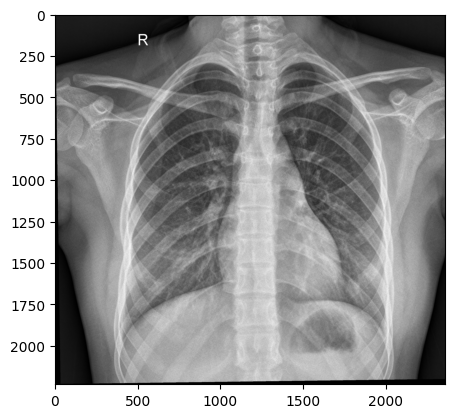

In [3]:
img = Image.open(images_dir[0])

print('format : ', img.format)
print('size : ', img.size)
print('mode : ', img.mode)
print('type : ', type(img))
np_image = asarray(img)
print('conversion type : ', type(np_image))
print('conversion shape : ', np_image.shape)
pyplot.imshow(img, cmap='gray')

# Autoencoder

In [4]:
def load_image(path) :
    target_size = (256,256)
    try : return resize(asarray(Image.open(path)), target_size)/255.
    except : None

In [6]:
test_dir

['/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/IM-0031-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/IM-0025-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/NORMAL2-IM-0272-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/NORMAL2-IM-0102-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/NORMAL2-IM-0229-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/NORMAL2-IM-0315-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/NORMAL2-IM-0123-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_xray/train/NORMAL/NORMAL2-IM-0301-0001.jpeg',
 '/Users/labess40/dev/keras-sklearn-medical-images-classification/chest_

In [43]:
target_size = (256, 256)
train_img = [load_image(image_dir) for image_dir in images_dir]
test_img = [load_image(image_dir) for image_dir in test_dir]

In [46]:
print(train_img[0])
print(len(train_img))
print('______')
print(test_img[0])
print(len(test_img))

[[0.         0.09019608 0.09411765 ... 0.10980392 0.11372549 0.12156863]
 [0.11372549 0.10980392 0.10980392 ... 0.09803922 0.10588235 0.09803922]
 [0.10196078 0.09803922 0.10196078 ... 0.04705882 0.04705882 0.04705882]
 ...
 [0.62745098 0.65490196 0.61960784 ... 0.60784314 0.60784314 0.62745098]
 [0.63529412 0.61176471 0.62352941 ... 0.30196078 0.30588235 0.35686275]
 [0.32941176 0.30980392 0.30196078 ... 0.07843137 0.06666667 0.06666667]]
1341
______
None
234


In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

In [ ]:
newsize = (300, 300)
im1 = im1.resize(newsize)

In [2]:
input_img = Input(shape=(256, 256, 1)) 

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')